In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import re
import sys
sys.path.append('/Users/doumengge/Desktop/开课吧/开课吧/project2')
import jieba
import pandas as pd
import numpy as np
import tensorflow as tf
tf.__version__

'2.0.0'

In [10]:
vocab_size=30000
padding_size=200

## 多分类

In [9]:
from utils.data_loader import build_data

In [46]:
params={
    'data_path':'data/baidu_95.csv',
    'vocab_path':'data/',
    'vocab_size':30000,
    'padding_size':200,
    'train_mode':"multi_class"
}

In [47]:
X_train, X_test, y_train, y_test = build_data(params)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/z7/4h871j5s4dzdtn7prw_6mf000000gn/T/jieba.cache
DEBUG:jieba:Loading model from cache /var/folders/z7/4h871j5s4dzdtn7prw_6mf000000gn/T/jieba.cache
Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/z7/4h871j5s4dzdtn7prw_6mf000000gn/T/jieba.cache
DEBUG:jieba:Loading model from cache /var/folders/z7/4h871j5s4dzdtn7prw_6mf000000gn/T/jieba.cache
Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/z7/4h871j5s4dzdtn7prw_6mf000000gn/T/jieba.cache
Building prefix dict from the default dictionary ...
DEBUG:jieba:Loading model from cache /var/folders/z7/4h871j5s4dzdtn7prw_6mf000000gn/T/jieba.cache
DEBUG:jieba:Building prefix dict from the

class category:  {'历史', '政治', '地理', '生物'}


In [23]:
feature_size=padding_size
embed_size=300
num_classes=len(y_train[0])
filter_sizes=[2,3,4]
dropout_rate=0.5
regularizers_lambda=0.01
learning_rate=0.01
batch_size=512
epochs=5

In [21]:
from utils.metrics import macro_f1,micro_f1

In [41]:
from model.TextCNN.TextCNN import TextCNN

In [44]:
from tensorflow.keras.callbacks import EarlyStopping
from pprint import pprint

In [ ]:
feature_size, num_classes, vocab_size,
                 embed_size, filter_sizes, num_filters, dropout_rate,regularizers_lambda,
                 embedding_matrix,train_mode,model_img_path=None):

In [42]:
textcnn =TextCNN(feature_size=feature_size, num_classes=num_classes,vocab_size=vocab_size, embed_size=embed_size, 
              filter_sizes = filter_sizes,num_filters = 2,train_mode = params['train_mode'])
model = textcnn.build_model()
model.compile(tf.optimizers.Adam(learning_rate=learning_rate), 
              loss='categorical_crossentropy',
              metrics=[micro_f1, macro_f1])

train_mode is: multi_class
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_data (InputLayer)         [(None, 200)]        0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 200, 300)     9000000     input_data[0][0]                 
__________________________________________________________________________________________________
add_channel (Reshape)           (None, 200, 300, 1)  0           embedding_5[0][0]                
__________________________________________________________________________________________________
convolution_2 (Conv2D)          (None, 199, 1, 2)    1202        add_channel[0][0]                
___________________________________________________________________

In [48]:
print('Train...')
early_stopping = EarlyStopping(monitor='val_micro_f1', patience=10, mode='max')

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          workers=32,
          use_multiprocessing=True,
          callbacks=[early_stopping],
          validation_data=(X_test, y_test))

Train...
Train on 18060 samples, validate on 4516 samples
Epoch 1/5
18060/18060 [==============================] - 35s 2ms/sample - loss: 0.3835 - micro_f1: 0.8141 - macro_f1: 0.6605 - val_loss: 0.0654 - val_micro_f1: 0.9805 - val_macro_f1: 0.9635
Epoch 2/5
18060/18060 [==============================] - 36s 2ms/sample - loss: 0.0175 - micro_f1: 0.9944 - macro_f1: 0.9894 - val_loss: 0.0427 - val_micro_f1: 0.9877 - val_macro_f1: 0.9758
Epoch 3/5
18060/18060 [==============================] - 37s 2ms/sample - loss: 0.0023 - micro_f1: 0.9997 - macro_f1: 0.9994 - val_loss: 0.0365 - val_micro_f1: 0.9884 - val_macro_f1: 0.9778
Epoch 4/5
18060/18060 [==============================] - 35s 2ms/sample - loss: 6.1809e-04 - micro_f1: 0.9999 - macro_f1: 0.9997 - val_loss: 0.0359 - val_micro_f1: 0.9896 - val_macro_f1: 0.9801
Epoch 5/5
18060/18060 [==============================] - 35s 2ms/sample - loss: 1.9752e-04 - micro_f1: 1.0000 - macro_f1: 1.0000 - val_loss: 0.0360 - val_micro_f1: 0.9894 - val_m

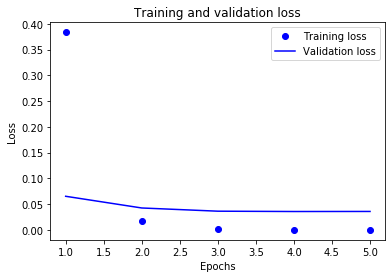

In [49]:
import matplotlib.pyplot as plt

history_dict = history.history
history_dict.keys()

micro_f1 = history_dict['micro_f1']
val_micro_f1 = history_dict['val_micro_f1']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(micro_f1) + 1)

# “bo”代表 "蓝点"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b代表“蓝色实线”
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

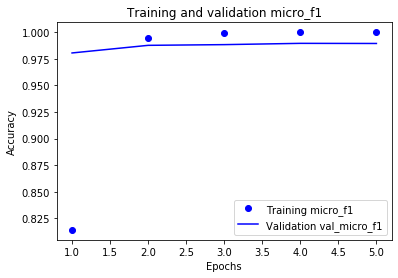

In [50]:
plt.clf()   # 清除数字

plt.plot(epochs, micro_f1, 'bo', label='Training micro_f1')
plt.plot(epochs, val_micro_f1, 'b', label='Validation val_micro_f1')
plt.title('Training and validation micro_f1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [51]:
from utils.plot_utils import plot_confusion_matrix
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
y_pred=model.predict(X_test)

In [53]:
y_pred=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_test,axis=1)

In [54]:
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       516
           1       0.98      0.98      0.98       943
           2       0.97      0.98      0.97       393
           3       1.00      1.00      1.00      2664

    accuracy                           0.99      4516
   macro avg       0.98      0.98      0.98      4516
weighted avg       0.99      0.99      0.99      4516



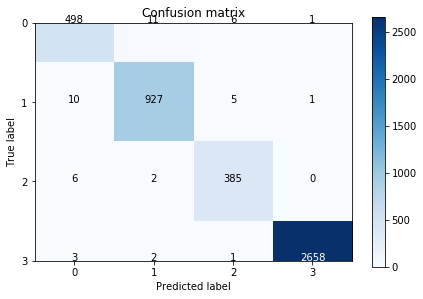

In [58]:
# 计算混淆矩阵
conf_mat=confusion_matrix(y_true,y_pred)
# 画混淆矩阵
plot_confusion_matrix(conf_mat,classes=[0,1,2,3])

## multilabel

In [59]:
params={
    'data_path':'data/baidu_95.csv',
    'vocab_path':'data/',
    'vocab_size':30000,
    'padding_size':200,
    'train_mode':"multi_label"
}
X_train, X_test, y_train, y_test = build_data(params)

Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/z7/4h871j5s4dzdtn7prw_6mf000000gn/T/jieba.cache
DEBUG:jieba:Loading model from cache /var/folders/z7/4h871j5s4dzdtn7prw_6mf000000gn/T/jieba.cache
Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
Loading model from cache /var/folders/z7/4h871j5s4dzdtn7prw_6mf000000gn/T/jieba.cache
Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the default dictionary ...
DEBUG:jieba:Loading model from cache /var/folders/z7/4h871j5s4dzdtn7prw_6mf000000gn/T/jieba.cache
Loading model from cache /var/folders/z7/4h871j5s4dzdtn7prw_6mf000000gn/T/jieba.cache
DEBUG:jieba:Loading model from cache /var/folders/z7/4h871j5s4dzdtn7prw_6mf000000gn/T/jieba.cache
Building prefix dict from the default dictionary ...
DEBUG:jieba:Building prefix dict from the

In [61]:
y_test.shape

(4516, 95)

In [62]:
feature_size=padding_size
embed_size=300
num_classes=len(y_train[0])
filter_sizes=[2,3,4]
dropout_rate=0.5
regularizers_lambda=0.01
learning_rate=0.01
batch_size=512
epochs=10

In [64]:
from utils.metrics import micro_f1, macro_f1

In [70]:
num_classes


95

In [ ]:
textcnn =TextCNN(feature_size=feature_size, num_classes=num_classes,vocab_size=vocab_size, embed_size=embed_size, 
              filter_sizes = filter_sizes,num_filters = 2,train_mode = params['train_mode'])
model = textcnn.build_model()
model.compile(tf.optimizers.Adam(learning_rate=learning_rate), 
              loss='categorical_crossentropy',
              metrics=[micro_f1, macro_f1])

In [72]:
from model.TextCNN.TextCNN import TextCNN

In [73]:
textcnn =TextCNN(feature_size=feature_size, num_classes=num_classes,vocab_size=vocab_size, embed_size=embed_size, 
              filter_sizes = filter_sizes,num_filters = 2,train_mode = params['train_mode'])
model = textcnn.build_model()
model.compile(tf.optimizers.Adam(learning_rate=learning_rate), 
              loss='binary_crossentropy',
              metrics=[micro_f1, macro_f1])

train_mode is: multi_label
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_data (InputLayer)         [(None, 200)]        0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 200, 300)     9000000     input_data[0][0]                 
__________________________________________________________________________________________________
add_channel (Reshape)           (None, 200, 300, 1)  0           embedding_7[0][0]                
__________________________________________________________________________________________________
convolution_2 (Conv2D)          (None, 199, 1, 2)    1202        add_channel[0][0]                
_________________________________________________________________

In [74]:
print('Train...')
early_stopping = EarlyStopping(monitor='val_micro_f1', patience=10, mode='max')

history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          workers=32,
          use_multiprocessing=True,
          callbacks=[early_stopping],
          validation_data=(X_test, y_test))

Train...
Train on 18060 samples, validate on 4516 samples
Epoch 1/10
18060/18060 [==============================] - 43s 2ms/sample - loss: 0.3265 - micro_f1: 0.2752 - macro_f1: 0.0231 - val_loss: 0.1715 - val_micro_f1: 0.3995 - val_macro_f1: 0.0183
Epoch 2/10
18060/18060 [==============================] - 43s 2ms/sample - loss: 0.1545 - micro_f1: 0.4401 - macro_f1: 0.0619 - val_loss: 0.1335 - val_micro_f1: 0.4749 - val_macro_f1: 0.0968
Epoch 3/10
18060/18060 [==============================] - 41s 2ms/sample - loss: 0.1167 - micro_f1: 0.5916 - macro_f1: 0.1786 - val_loss: 0.1017 - val_micro_f1: 0.6719 - val_macro_f1: 0.2461
Epoch 4/10
18060/18060 [==============================] - 42s 2ms/sample - loss: 0.0871 - micro_f1: 0.7203 - macro_f1: 0.3160 - val_loss: 0.0841 - val_micro_f1: 0.7413 - val_macro_f1: 0.3481
Epoch 5/10
18060/18060 [==============================] - 36s 2ms/sample - loss: 0.0707 - micro_f1: 0.7813 - macro_f1: 0.4017 - val_loss: 0.0782 - val_micro_f1: 0.7599 - val_macr

In [75]:
y_pred=model.predict(X_test)

In [76]:
y_pred = np.where(y_pred>0.5,1,0)

In [77]:
from sklearn.metrics import f1_score,accuracy_score

In [78]:
f1_score(y_test,y_pred,average='samples')

0.7748147763719023

In [82]:
true_false = tf.equal(y_test, y_pred)

In [85]:
import tensorflow.keras.backend as K

In [87]:
K.sum(tf.cast(true_false,tf.float32)).numpy()/(len(y_pred)*len(y_pred[0]))

0.9759941261479651

In [79]:
pprint(history.history)

{'loss': [0.3265230028039197,
          0.15451037952736235,
          0.11669086494781118,
          0.08709802281354881,
          0.07074120006093947,
          0.06282654411983517,
          0.05780409242244126,
          0.053924553092168946,
          0.05099745854025795,
          0.04848601523774407],
 'macro_f1': [0.023060482,
              0.061897106,
              0.17855515,
              0.31598005,
              0.40174186,
              0.45159546,
              0.49013436,
              0.52024275,
              0.54680693,
              0.5746394],
 'micro_f1': [0.2751665,
              0.4401221,
              0.59159017,
              0.72027284,
              0.78127086,
              0.8055879,
              0.8209994,
              0.8344183,
              0.84271836,
              0.8518493],
 'val_loss': [0.17146505316450492,
              0.13348466573667483,
              0.10165445587743796,
              0.08409562306371382,
              0.0782463965134033

In [89]:
from utils.config import root

In [90]:
save_path = os.path.join(root,'saved_model',"TextCNN.h5")
tf.keras.models.save_model(model, save_path)